# Вычислительная линейная алгебра

Рассмотрим СЛАУ

$$ Ax = b, $$
$$ A =
\begin{bmatrix}
    a_{11} & a_{12} & \dots & a_{1n} \\
    a_{21} & a_{22} & \dots & a_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n1} & a_{n2} & \dots & a_{nn}
\end{bmatrix}, \;
detA \neq 0, \quad
x =
\begin{bmatrix}
    x_1 \\ \vdots \\ x_n
\end{bmatrix}, \quad
b =
\begin{bmatrix}
    b_1 \\ \vdots \\ b_n
\end{bmatrix}.
$$

## Методы решения
- Прямые методы
- Итерационные методы

## Векторные нормированные пространства

> Для оценки погрешности вычисления нужно как-то оценивать разность точного и приближенного решения $(x^* - x) \quad x \equiv\vec{x}$

**Определение** Норма вектора $x$

$ x \in \R^{n}, \; \| x \| \rightarrow \R^+ $
- $ \| x \| = 0 \Leftrightarrow x = 0 $

- $ \| \alpha x \| = |\alpha|\| x \| , \; \forall \alpha \in \R $

- $ \| x + y \| \leq \| x \| + \| y \|\; $ (неравенство треугольника)

### p - нормы

$$  \| x \|_p = \left( \sum_{i=1}^{n} |x_i|^p \right)^{1/p} $$

При $p\rightarrow\infty$, Кубическая $$ \| x \|_\infty = \max_{i}|x_i| $$
L1, Manhattan, Октаэдрическая
$$  \| x \|_1 = \sum_{i=1}^{n} |x_i| $$
L2, Эвклидова
$$  \| x \|_2 = \sqrt{\sum_{i=1}^{n} |x_i|^2} = (x,x)$$

## Эквивалентность норм

**Определение**

Нормы $\|\cdot\|_a$ и $\|\cdot\|_b$ называются *эквивалентными*, если $\exist \gamma_1, \; \gamma_2$:
$$ \forall x \in \R^n \;\; \gamma_1\|x\|_a \leq \|x\|_b \leq \gamma_2\|x\|_a $$

**Теорема** Об эквивалентности норм

Любые две нормы в конечномерном векторном пространстве эквиваленты.

**Следствие**

В силу теоремы об эквивалентности норм все утверждения теорем
верны для любых норм, поэтому далее выбор нормы не конкретизируется. 

## Матричные нормы

$ A \in \R^{m \times n}, \; \| A \| \rightarrow \R^+ $
- $ \| A \| = 0 \Leftrightarrow x = \bold{0} $

- $ \| \alpha A \| = |\alpha|\| A \| , \; \forall \alpha \in \R $

- $ \| A + B \| \leq \| A \| + \| B \|\; $

- $ \| A B \| \leq \| A \| \| B \|\; $ (субмультипликативность)

#### Матричная норма подчиненная норме вектора

$$ \| A \| = \sup_{x \neq 0} \frac{\|Ax\|}{\|x\|} $$

Примеры

$$  \| A \|_{\infty} = \max_{1\leq i \leq m} \sum_{j=1}^{n} |a_{ij}| $$
$$  \| A \|_1 = \max_{1\leq j \leq n} \sum_{i=1}^{m} |a_{ij}| $$
$$  \| A \|_2 = \sqrt{\lambda_{max}(A^*A)} $$

> $A^*$ - сопряженная матрица. Если все элементы $A$ действительные $A^* = A^T$

## Обусловленность СЛАУ

Система $Ax=b$ при ее решении на компьютере представляется как

$$ (A + \Delta A)(x + \Delta x) = b + \Delta b $$ 

**Теорема**

Пусть правая часть $b$ и матрица $A$ СЛАУ $Ax=b$ получили приращения $\Delta b$ и $\Delta A$. При этом существует $A^{-1}$ и $\|A\| \neq 0$, $\mu \frac{\|\Delta A\|}{\|A\|} \neq 1$ $\;\left( \mu =\|A\|\|A^{-1}\| \right)$.

В таком случае относительная погрешность решения будет удовлетворять неравенству:
$$ \frac{\|\Delta x\|}{\|x\|} \leq \frac{\mu}{1-\mu\frac{\|\Delta A\|}{\|A\|}} \left( \frac{\|\Delta b\|}{\|b\|} + \frac{\|\Delta A\|}{\|A\|}\right).$$

> $\mu=\|A\|\|A^{-1}\|$ называется числом обусловленности СЛАУ, $\mu \geq 1$

> Если $A = A^*\;$ то $\mu = \max\limits_{i}|\lambda_i|/\min\limits_{i}|\lambda_i|$

#### Пример плохо обусловленной системы

$$
\begin{cases}
100x_1 + 99x_2 = 199 \\
99x_1 + 98x_2 = 197
\end{cases}
$$ 
Точное решение $ x = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $

In [2]:
import numpy as np
A = np.array([[100, 99],
              [ 99, 98]])
print('cond_inf(A) = {0:5.2e}'.format(np.linalg.cond(A, np.inf)))

cond_inf(A) = 3.96e+04


In [3]:
# Возмущенная правая часть
eps = 1e-2
b = np.array([199 - eps, 197 + eps])
x = np.linalg.solve(A, b)
print(x)

[ 2.97 -0.99]


$$\delta x = \frac{\|\Delta x\|}{\|x\|} \leq \mu \frac{\|\Delta b\|}{\|b\|} \approx 4 \cdot 10^4 \cdot \frac{ 10^{-4} }{ 2 } = 2 $$

## Прямые методы решения СЛАУ

Прямые методы позволяют в предположении отсутствия ошибок округления получить точное решение задачи за конечное число арифметических действий.

- Метод Крамера - количество операций $\sim n^4$
- Метод Гаусса - количество операций $\sim\frac{2}{3}n^3+n^2$
- Метод Гаусса-Жордана - количество операций $\sim\frac{4}{3}n^3$
- ...

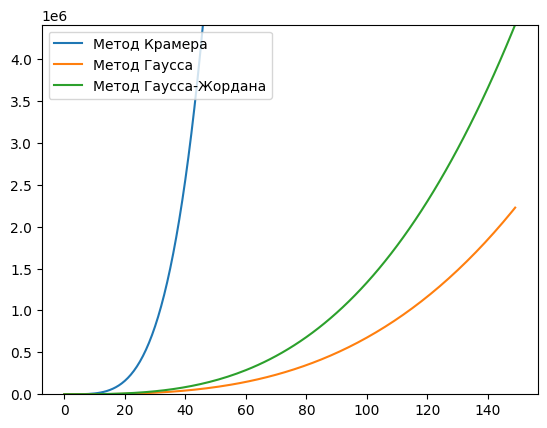

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
x = np.arange(150)
plt.plot(x, x**4, label='Метод Крамера')
plt.plot(x, 2 / 3 * x**3 + x**2, label='Метод Гаусса')
plt.plot(x, 4 / 3 * x**3, label='Метод Гаусса-Жордана')
plt.ylim((0, max(4 / 3 * x**3)))
plt.legend()

#### Метод Гаусса и LU-разложение

##### Прямой ход
Приведение матрицы к треугольной форме
$$
\underset{A}{\begin{bmatrix}
* & * & * & * \\
* & * & * & * \\
* & * & * & * \\
* & * & * & *
\end{bmatrix}} \xrightarrow{L_1}
\underset{A_1}{\begin{bmatrix}
* & * & * & * \\
0 & \boldsymbol{*} & \boldsymbol{*} & \boldsymbol{*} \\
0 & \boldsymbol{*} & \boldsymbol{*} & \boldsymbol{*} \\
0 & \boldsymbol{*} & \boldsymbol{*} & \boldsymbol{*}
\end{bmatrix}} \xrightarrow{L_2}
\underset{A_2}{\begin{bmatrix}
* & * & * & * \\
 & * & * & * \\
 & 0 & \boldsymbol{*} & \boldsymbol{*} \\
 & 0 & \boldsymbol{*} & \boldsymbol{*}
\end{bmatrix}} \xrightarrow{L_3}
\underset{A_3}{\begin{bmatrix}
* & * & * & * \\
 & * & * & * \\
 & & * & * \\
 & & 0 & \boldsymbol{*}
\end{bmatrix}}
$$
$A_1: \quad a^1_{ij} = a_{ij}-\eta_{i1}a_{1j};\quad b^1_{i} = b_{i}-\eta_{i1}b_{1};\quad \eta_{i1} = \frac{a_{i1}}{a_{j1}};\quad i,j=2,...,n.$

$A_2: \quad a^2_{ij} = a^1_{ij}-\eta_{i2}a^1_{2j};\quad b^2_{i} = b^1_{i}-\eta_{i2}b^1_{2};\quad \eta_{i2} = \frac{a^1_{i2}}{a^1_{j2}};\quad i,j=3,...,n.$

$A_k: \quad ...$

##### Обратный ход
Получение решения

$$\begin{bmatrix}
* & * & * & * \\
 & * & * & * \\
 & & * & * \\
 & & & *
\end{bmatrix} x = \widetilde{b}$$
$ x_n = \widetilde{b}_n / a_{nn} $   

$ x_k = \frac{1}{a_{kk}}\left(\widetilde{b}_k - a_{k,k+1}x_{k+1} - \dots - a_{kn}x_n \right), \; k = n-1, n-2, \dots, 1 $ 

Данные формулы для метода Гаусса получены в предположении $a_{kk} \neq 0$.

#### LU-разложение

$$ A \rightarrow A_1 = L_1A \rightarrow A_2 = L_2A_1 \rightarrow ...  \rightarrow A_{n-1} = L_{n-1}A_{n-2} $$
$$ b \rightarrow b_1 = L_1b \rightarrow b_2 = L_2b_1 \rightarrow ...  \rightarrow b_{n-1} = L_{n-1}b_{n-2} $$
$$ L_1 = \begin{bmatrix}
1 & 0 & 0 & 0 \\
-\eta_{21} & 1 & 0 & 0 \\
-\eta_{31} & 0 & 1 & 0 \\
-\eta_{41} & 0 & 0 & 1
\end{bmatrix}  
L_2 = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & -\eta_{32} & 1 & 0 \\
0 & -\eta_{41} & 0 & 1
\end{bmatrix} \;\dots\;\;
L_{n-1} = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & -\eta_{n,n-1} & 1
\end{bmatrix};
$$
$$ A_{n-1} = L_{n-1}\dots L_2L_1A $$
$$ \underline{A = L_1^{-1}L_2^{-1}\dots L_{n-1}^{-1}A_{n-1} = LU} $$
$$ L = \begin{bmatrix}
1 & 0 & \dots & 0 \\
-\eta_{21} & 1 & \dots & 0 \\
\dots & \dots & \dots & \dots \\
-\eta_{n1} & -\eta_{n2} & \dots & 1
\end{bmatrix} \quad U =  \begin{bmatrix}
* & * & * & * \\
 & * & * & * \\
 & & * & * \\
 & & & *
\end{bmatrix}$$


Процесс решения
1. Вычисление LU-разложения $Ax=b \rightarrow LUx=b$
2. Решение системы $Ly=b$
3. Решение системы $Ux=y$

Другие приложения LU-разложения
1. Нахождение обратной матрицы:

$\quad\quad$Решение систем $\;Ax_i=e_i, \; I = [e_1|e_2|...|e_n] \quad \rightarrow \quad A^{-1} = [x_1|x_2|...|x_n]$

2. Вычисление определителя
$$det(A)=det(LU)=det(L)det(U)=\left(\prod_{i=1}^n L_{ii}\right)\left(\prod_{i=1}^n U_{ii}\right)$$

#### Методы с выбором главного элемента (pivoting)
**Пример**

$$ \begin{cases}
-10^{-7}x+y = 1 \\
x+2y = 4
\end{cases} $$

Решая данную систему с семью значащими цифрами методом Гаусса в исходном виде получим
$$ y = 1.\underbrace{0\dots 0}_{6}; \quad x = 0.\underbrace{0\dots 0}_{6}$$

Если поменять уравнения местами
$$ \begin{cases}
x+2y = 4 \\
-10^{-7}x+y = 1
\end{cases} $$
Получим
$$ y = 1.\underbrace{0\dots 0}_{6}; \quad x = 2.\underbrace{0\dots 0}_{6}$$

В реальных вычислениях используются методы с выбором главного (или ведущего) элемента. Выбор главного элемента по столбцам реализуется следующим образом:

перед исключением $x_1$ отыскивается $\max\limits_{i}|a_{i1}|, \; i=1,...,n$ и соответсвующая строка меняется местами с исходной, далее аналогично берется $\max\limits_{i}|a^1_{i2}|, \; i=2,...,n$ и производится перестановка строк и т.д.

При выполнении условия **диагонального преобладания** ($">"$-строгое)
$$|a_{ii}| \geq \sum_{j=1, j\neq i}^{n} |a_{ij}|; \quad i = 1,\dots,n$$
такие проблемы не возникают.

In [5]:
# LU-factorization with pivoting
from scipy import linalg
A = np.array([[-1e-7, 1], [1, 2]])
P, L, U = linalg.lu(A)
print('P = \n', P)
print('L = \n', L, '\n')
print('U = \n', U, '\n')
print('A - P @ L @ U = \n', A - P @ L @ U)

P = 
 [[0. 1.]
 [1. 0.]]
L = 
 [[ 1.e+00  0.e+00]
 [-1.e-07  1.e+00]] 

U = 
 [[1.        2.       ]
 [0.        1.0000002]] 

A - P @ L @ U = 
 [[0.00000000e+00 1.11022302e-16]
 [0.00000000e+00 0.00000000e+00]]


##### Разложение Холецкого (метод квадратного корня)

Если $A$ симметричная и положительно определенная
$$ A = LL^T$$ 
$$ L = \begin{bmatrix}
l_{11} & 0 & \dots & 0 & 0 \\
l_{12} & l_{22} & \dots & 0 & 0 \\
\dots & \dots & \dots & \dots & \dots \\
l_{1n} & l_{2n} & \dots & l_{n-1,n} & l_{nn}
\end{bmatrix} \quad
L^T = \begin{bmatrix}
l_{11} & l_{12} & \dots & l_{2n} & l_{1n} \\
0 & l_{22} & \dots & l_{2,n-1} & l_{1,n-1} \\
\dots & \dots & \dots & \dots & \dots \\
0 & 0 & \dots & 0 & l_{nn}
\end{bmatrix}$$


- $ l_{11} = \sqrt{a_{11}} $
- $ l_{i1} = \frac{a_{i1}}{l_{11}}, \quad i = 2,\dots,n $
- $ l_{ii} = \sqrt{a_{ii} - \sum\limits_{k = 1}^{i-1}l_{ik}^2}, \quad i = 2,\dots,n $
- $ l_{ij} = \frac{1}{l_{ii}} \left(a_{ij} - \sum\limits_{k = 1}^{j-1}l_{ik}l_{jk}\right), \quad j = 2,\dots,n-1; \; i = j+1,\dots,n $

В этом случае количество арифметических операций примерно в два раза меньше чем для LU-разложения и метод более устойчивый.

In [6]:
# Cholesky decomposition
from scipy import linalg
A = np.array([[3, 1], [1, 2]])
L = linalg.cholesky(A)
print('L = \n', L, '\n')
print('L.T = \n', L.T, '\n')
print('A - L @ L.T = \n', A - L.T @ L)

L = 
 [[1.73205081 0.57735027]
 [0.         1.29099445]] 

L.T = 
 [[1.73205081 0.        ]
 [0.57735027 1.29099445]] 

A - L @ L.T = 
 [[4.4408921e-16 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]]


#### Уточнение решения полученного прямым методом

Из-за ошибок округления решение будет получено с некоторой погрешностью

$$ r^1 = b - Ax^1 $$
$$ r^1 = Ax - Ax^1 $$
$$ r^1 = A(x - x^1) = Ae^1 $$

Решая систему $ Ae^1 = r^1 $ можно получить уточненное решение
$$ x^2 = x^1 + e^1$$

#### Недостатки прямых методов
- Cложность $O(n^3)$ для матриц общего вида
- Накопление огрешности из-за ошибок округления
- Нельзя найти приближение к решению с заданной погрешностью
- Необходимость хранить все элементы мтарицы в явном виде

## Итерационные методы решения СЛАУ

#### Общий вид
$$
\begin{align*}
Ax = b \iff x & =  Rx + f \\
x^{k} & =  R x^{k-1} + f
\end{align*}
$$

Решение системы $Ax = b$ находится как предел последовательности $\{x^0, x^1, x^2, ...\}$

Если предел такой последовательности существует, то говорят о сходимости итерационного процесса
к решению СЛАУ.

Также нужно задать начальное приближение $x^{0}$ и *критерий остановки*, например: $$\| A x^{k} - b \| \le \varepsilon$$

Оценка погрешности
$$e^{k} = (x^{k} - x) = R (x^{k-1} - x) = R^k (x^{0} - x) = R^k e^{0}$$

**Теорема** Критерий сходимости

Пусть СЛАУ имеет единственное решение. Тогда для сходимости итерационного процесса $x^{k} = R x^{k-1} + f$ необходимо и достаточно, чтобы все собственные значения матрицы $R$ по абсолютной величине были меньше единицы $(\rho(R) < 1)$.
$$e^{k} \to 0 \iff \forall e^0 \; R^k e^{0} \to 0 \iff \rho(R) < 1$$



**Теорема** Достаточное условие сходимости

Итерационный процесс $x^{k} = R x^{k-1} + f$ сходится к решению $x$ СЛАУ $Ax=b$ со скоростью геометрической прогрессии при выполнении условия: $\|R\| = q < 1.$

$$\Vert e^{k}\Vert = \Vert R^k e^{0}  \Vert \le \Vert R \Vert^k \Vert e^{0} \Vert = q^k \Vert e^{0} \Vert \rightarrow 0 \Leftrightarrow q < 1$$

Из неравенства $\Vert e^{k}\Vert \le q^k \Vert e^{0} \|$ можно получить оценку количества итераций, необходимых для достижения точности $e$, т.е. для выполнения условия $\| x^{k} - x \| \le e$.

Эта оценка имеет вид $\;k \geq \left(\ln\frac{e}{\|e_0\|}\right)/\ln{q}.$

#### Метод простой итерации (Ричардсона)

Проведем несколько равносильных преобразований для исходной системы
$$
\begin{align*}
& A x = b \\
& \tau (Ax - b) = 0 \\
& x - \tau (Ax - b) = x \\
& \underline{x^{k+1} = x^{k} - \tau (A x^{k} - b)  = (I - \tau A) x^{k} + \tau b}
\end{align*}
$$
$\tau$ - итерационный параметр. $R = I - \tau A$

Рассмотрим случай $A = A^T > 0$
$$\rho(R) < 1 \quad \Leftrightarrow \quad |1 - \tau \lambda_i| < 1, \; i = 1, \ldots, n$$
$$(1 - \tau \lambda_i)^2 < 1 \Rightarrow \; \tau \lambda_i (\tau \lambda_i - 2) < 0 \Rightarrow  \underline{0 < \tau < \frac{2}{\lambda_{max}}}$$

Оптимальный выбор параметра
$$\Vert e^{k} \Vert_2 = \Vert (I - \tau A)^k e^{0} \Vert_2 \le \Vert (I - \tau A) \Vert_2^k \Vert e^{0} \Vert_2$$
$$\tau_\mathrm{opt} = \frac{2}{\lambda_{\min} + \lambda_{\max}} \quad \rightarrow \quad q = \frac{\lambda_{\max} - \lambda_{\min}}{\lambda_{\max} + \lambda_{\min}} = \frac{\mu(A) - 1}{\mu(A)+1}$$

In [7]:
plt.rc("text", usetex=True)
import scipy as sp
import scipy.sparse.linalg as spla
n = 10
ex = np.ones(n)
A = sp.sparse.spdiags(np.vstack((-1*ex,  2*ex, -1*ex)), [-1, 0, 1], n, n, 'csr')
print(A.toarray()) 
rhs = np.ones(n)
ev1, vec = spla.eigsh(A, k=2, which='LA')
ev2, vec = spla.eigsh(A, k=2, which='SA')
lam_max = ev1[0]
lam_min = ev2[0]

tau_opt = 2.0/(lam_max + lam_min)

fig, ax = plt.subplots()
plt.close(fig)

niters = 100
x = np.zeros(n)
res_richardson = []
for i in range(niters):
    rr = A.dot(x) - rhs
    x = x - tau_opt * rr
    res_richardson.append(np.linalg.norm(rr))
#Convergence of an ordinary Richardson (with optimal parameter)
plt.semilogy(res_richardson)
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("Residual norm, $\|Ax_k - b\|_2$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
print("Maximum eigenvalue = {}, minimum eigenvalue = {}".format(lam_max, lam_min))
cond_number = lam_max.real / lam_min.real
print("Condition number = {}".format(cond_number))
# print(np.array(res_richardson)[1:] / np.array(res_richardson)[:-1])
print("Theoretical factor: {}".format((cond_number - 1) / (cond_number + 1)))

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]
Maximum eigenvalue = 3.6825070656623624, minimum eigenvalue = 0.08101405277100543


Condition number = 45.455164131479115
Theoretical factor: 0.956947735792311
Error in callback <function _draw_all_if_interactive at 0x000001A4790DF560> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

#### Методы Якоби и Гаусса-Зейделя

Представим матрицу $A$ в виде 
$$A = L + D + U$$
где $L$ и $U$ — нижняя и верхняя треугольные матрицы с нулевыми элементами на главной диагонали, $D$ — диагональная матрица.

**Метод Якоби**
$$(L+D+U)x = b \quad \Leftrightarrow \quad Dx = -(L+U)x + b$$
Если $D^{-1}$ существует ($a_{ii} \neq 0$), то
$$ x = -D^{-1}(L+U)x + D^{-1}b$$
$$ x^k = -D^{-1}(L+U)x^{k-1} + D^{-1}b$$

**T.** Достаточное условие сходимости метода Якоби 

Итерационный метод Якоби сходится к решению соответствующей СЛАУ,
если выполнено условие диагонального преобладания
$$|a_{ii}| > \sum_{j=1, j\neq i}^{n} |a_{ij}|; \quad i = 1,\dots,n.$$

**T.** Критерий сходимости метода Якоби 

Для сходимости итерационного метода Якоби необходимо и достаточно,
чтобы все корни уравнения
$$
\begin{vmatrix}
\lambda a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & \lambda a_{22} & \dots & a_{2n} \\
\dots & \dots & \dots & \dots \\
a_{n1} & a_{n2} & \dots & \lambda a_{nn}
\end{vmatrix} = 0
$$
по модулю не превосходили единицы.

**Метод Гаусса-Зейделя (Зейделя)**
$$(L+D+U)x = b \quad \Leftrightarrow \quad (L + D)x = -Ux + b$$
Если $(L+D)^{-1}$ существует (также $a_{ii} \neq 0$), то
$$ x = -(L+D)^{-1}Ux + (L+D)^{-1}b$$
$$ x^k = -(L+D)^{-1}Ux^{k-1} + (L+D)^{-1}b$$

**T.** Достаточное условие сходимости метода Зейделя 

Пусть $А$ — вещественная, симметричная, положительно определенная
матрица. В этом случае итерационный метод Зейделя сходится.